# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [6]:
df = pd.read_csv("data_banknote_authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Diving the data into features and labels (X and y)

In [19]:
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 11, 12],             
    'max_features': ['sqrt', 'log2', None],     
    'criterion': ['gini', 'entropy']             
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_rf_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 12}
Best Score: 0.99375


Evaluate the model by displaying a confusion matrix and a classification report 

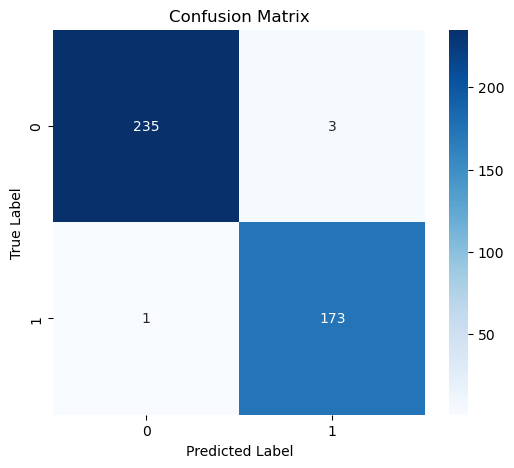

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      0.99      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [55]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
